In [7]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [8]:
glove_file = datapath('C:/Users/vipul/Desktop/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [10]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [11]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.9272854328155518),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875634074211121),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488930225372314),
 ('kerry', 0.7472623586654663)]

In [12]:
model.most_similar("food")

[('foods', 0.7469059228897095),
 ('supplies', 0.726469099521637),
 ('products', 0.7225048542022705),
 ('meat', 0.7138239145278931),
 ('supply', 0.6732637882232666),
 ('feed', 0.6704155206680298),
 ('medicines', 0.6687097549438477),
 ('meals', 0.6630423069000244),
 ('coffee', 0.6627735495567322),
 ('goods', 0.6610530614852905)]

In [13]:
model.most_similar("happy")

[("'m", 0.8413287401199341),
 ('feel', 0.8132575750350952),
 ("'re", 0.8048083782196045),
 ('i', 0.7938276529312134),
 ("'ll", 0.7916272878646851),
 ('really', 0.7903971076011658),
 ('glad', 0.7833361029624939),
 ('good', 0.7821646332740784),
 ('we', 0.7808917164802551),
 ('sure', 0.7788467407226562)]

In [14]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [15]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [16]:

analogy('japan', 'japanese', 'australia')

'australian'

In [17]:

analogy('obama', 'clinton', 'modi')

'narendra'

In [18]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))


cereal


C:\Users\vipul\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [19]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

In [20]:
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\vipul\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<IPython.core.display.Javascript object>


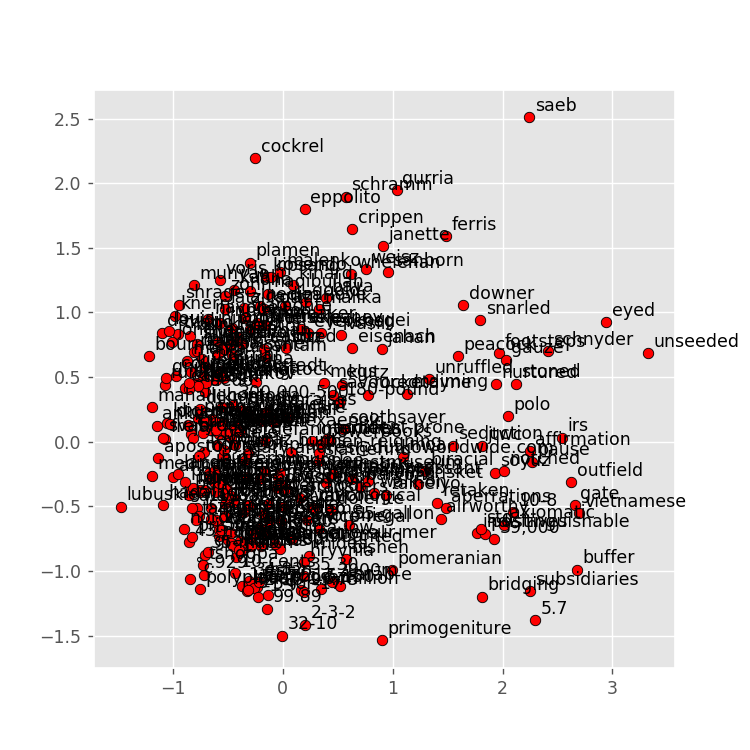

In [23]:
display_pca_scatterplot(model, sample=300)